In [1]:
import tensorflow as tf
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

from flows import *

import os

In [2]:
os.environ["CUDA_VISIBLE_DEVICES"] = "1" # pick a number < 4 on ML4HEP; < 3 on Voltan 
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
data = np.load("../data/zenodo/Herwig_Zjet_pTZ-200GeV_0.npz")

dat_pt =  data['sim_jets'][:, 0]
dat_eta = data['sim_jets'][:, 1]
dat_phi = data['sim_jets'][:, 2]
dat_m =   data['sim_jets'][:, 3]

In [4]:
dat = np.vstack([dat_pt, dat_eta, dat_phi, dat_m]).T

In [5]:
dat_target = flow(dat, ckpt_path = 'dat/ckpt')

2022-12-08 23:43:47.725471: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-08 23:43:48.296268: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 21430 MB memory:  -> device: 0, name: Quadro RTX 6000, pci bus id: 0000:81:00.0, compute capability: 7.5
  0%|          | 0/40 [00:00<?, ?it/s]

Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.while_loop(c, b, vars, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.while_loop(c, b, vars))


100%|██████████| 40/40 [11:17:57<00:00, 1016.94s/it]  


In [6]:
N = dat.shape[0]
smp = dat_target.sample(N)

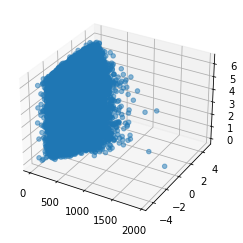

In [24]:
ax = plt.axes(projection='3d')
ax.scatter3D(dat[:, 0], dat[:, 1], dat[:, 2], alpha = 0.5)

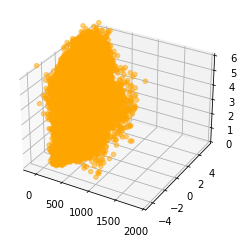

In [25]:
ax = plt.axes(projection='3d')
ax.scatter3D(smp[:, 0], smp[:, 1], smp[:, 2], c = 'orange', alpha = 0.5)
ax.set_xlim(-200, 2000)
ax.set_zlim(0, 6);

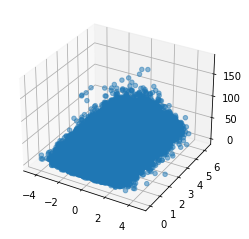

In [26]:
ax = plt.axes(projection='3d')
ax.scatter3D(dat[:, 1], dat[:, 2], dat[:, 3], alpha = 0.5)

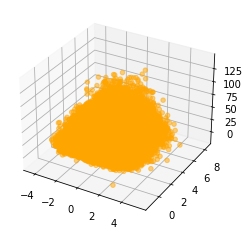

In [27]:
ax = plt.axes(projection='3d')
ax.scatter3D(smp[:, 1], smp[:, 2], smp[:, 3], c = 'orange', alpha = 0.5)

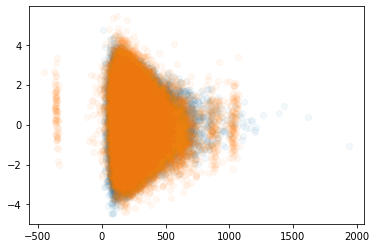

In [28]:
plt.scatter(dat[:, 0], dat[:, 1], alpha = 0.05)
plt.scatter(smp[:, 0], smp[:, 1], alpha = 0.05)

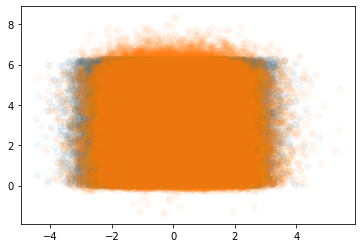

In [29]:
plt.scatter(dat[:, 1], dat[:, 2], alpha = 0.05)
plt.scatter(smp[:, 1], smp[:, 2], alpha = 0.05)

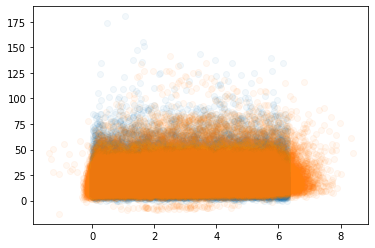

In [30]:
plt.scatter(dat[:, 2], dat[:, 3], alpha = 0.05)
plt.scatter(smp[:, 2], smp[:, 3], alpha = 0.05)